In [78]:
from lib import *
import glob

In [ ]:
# files = glob.glob("./datasets/**/*.avi", recursive=True)
# f = files[3]
# frames: np.array = BasicUtil.video2frames(f)
# img = frames[0]
# display(Image.fromarray(img))

# grayscale_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# column, row, width, height = face_cascade.detectMultiScale(grayscale_image)[0]
# cropped_image = img[row:(row+height), column:(column+width)]
# display(Image.fromarray(cropped_image))

# cropped_image = cv2.resize(cropped_image, (224, 224))
# display(Image.fromarray(cropped_image))

init video2frames
num_total_frames 75.0
cantidad frames:  16


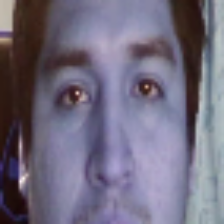

In [85]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

URL = 'http://localhost:3001/videos/'
video ='6xfgIsjz2EAF4zij1TN6YSeLVjHa9AnH5Qo3URnfbvMGCZ2IgMpTd8qKHVWOozPN.webm'
any_video = URL+video
frames = BasicUtil.video2frames(any_video)
img = frames[0]

grayscale_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
column, row, width, height = face_cascade.detectMultiScale(grayscale_image)[0]
cropped_image = img[row:(row+height), column:(column+width)]

cropped_image = cv2.resize(cropped_image, (224, 224))
display(Image.fromarray(cropped_image))

init video2frames
num_total_frames 75.0
cantidad frames:  16
150528 224


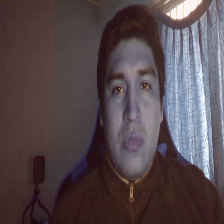

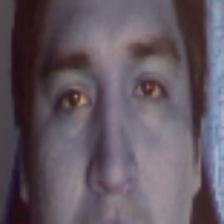

c:\Users\Diego\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
c:\Users\Diego\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


tensor([1])


In [89]:
URL = 'http://localhost:3001/videos/'
video ='Dw7bQRvOMTPQgwaRfZThM7yKBHPp8LhCNw2wGisOZWrpc0UKEvuzCcsHiQdgr6oi.webm'
any_video = URL+video
frames = BasicUtil.video2frames(any_video)

img = frames[0]
model = torchvision.models.resnet18(pretrained=True)
for e in model.parameters():
    e.requires_grad = False
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model.fc = nn.Linear(in_features=512, out_features=4, bias=True)
model.load_state_dict(torch.load("./models/resnet18_5.pt"))
# print(frames[0].size, len(frames[0]))
preprocess = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
tensor_frame = preprocess(img)
tensor_frame = tensor_frame.unsqueeze(0)
outputs = model(tensor_frame)
_, predicted = torch.max(outputs.data, 1)
print(predicted)

In [ ]:
x_train, y_train = load_casia_dataset("train_release")

In [28]:
try:
    URL = 'http://localhost:3001/videos/'
    video ='6xfgIsjz2EAF4zij1TN6YSeLVjHa9AnH5Qo3URnfbvMGCZ2IgMpTd8qKHVWOozPN.webm'
    # event = json.loads(msg.decode('utf-8'))
    any_video = URL+video
    model = torchvision.models.resnet18(pretrained=True)
    for e in model.parameters():
        e.requires_grad = False
    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
    model.fc = nn.Linear(in_features=512, out_features=4, bias=True)
    model.load_state_dict(torch.load("../../models/resnet18_5.pt"))
    model.to(device)
    frames = BasicUtil.video2framesSR(any_video)
    # display(Image.fromarray(frames[0]))
    # aux = cv2.resize(frames[0], (224, 224))
    # display(Image.fromarray(aux))
    # encoding = face_recognition.face_encodings(aux)

    dataset_x = []
    dataset_x = [*dataset_x, *frames]
    dataset_x = np.array(dataset_x)
    tensor_y_test = torch.as_tensor(np.array([0 for i in range(16)]))
    data_test: MyDataset = MyDataset(dataset_x, tensor_y_test)
    test_loader: DataLoader = DataLoader(dataset=data_test, shuffle=False)
    print(len(test_loader))
    res = []
    for images, _ in test_loader:
        images = images.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        res.append(np.array(predicted.cpu())[0])
    print(res)
    print(st.mode(res).mode[0] == 0)
except Exception as e:
    print(e)
    # return False

c:\Users\Diego\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
c:\Users\Diego\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


video2frames2
video2frames:  16
16
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
False
